# Задание для итоговой работы

**Анализ данных о покупках** 

Нужно выполнить предварительную обработку данных, сделать разведочный анализ данных EDA, затем проверить гипотезу о данных, выполнить кластеризацию по товарам, определить важные признаки, построить рекомендательную систему. Метод для составления рекомендаций выбрать самостоятельно.

Файл с датасетом - dataset.csv

Датасет - информация о покупках клиентов:

**Дата** - время покупки

**Транзакция** - уникальный номер покупки

**Клиент** - уникальный номер клиента

**Товар** - уникальный номер товара

**Количество** - количество купленных товаров

**Сумма** - цена покупки этого товара

### 1. Импорт библиотек

In [2]:
#Ваш код
%matplotlib inline

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np

import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

# from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# увеличим дефолтный размер графиков
from pylab import rcParams

import statistics

rcParams["figure.figsize"] = 10, 6
sns.set_style("whitegrid", {'axes.grid' : True})


### 2. Загрузка данных

In [3]:
#Ваш код
datas= pd.read_csv('dataset.csv', sep = ';')
print(datas.head(10))
print('\n')
print('Инфо : ') 
print(datas.info())


               Дата  Транзакция  Клиент   Товар  Количество    Сумма
0  03.05.2020 21:43         954       1  2874.0         1.0   8150.0
1  20.11.2020 20:46       13796       1  3586.0         1.0   3930.0
2  08.12.2020 16:28       14431       1  4942.0         1.0   2860.0
3  03.05.2020 21:15         951       2  2812.0         1.0   4895.0
4  20.05.2020 16:46        3352       2  5025.0         1.0    840.0
5  19.09.2020 20:26       10240       2  2741.0         1.0   5790.0
6  19.09.2020 20:26       10240       2  2231.0         1.0  27400.0
7  19.09.2020 20:26       10240       2  2634.0         1.0   5095.0
8  19.09.2020 20:26       10240       2  1958.0         1.0   8320.0
9  16.05.2021 14:38       22180       2  1924.0         1.0  13200.0


Инфо : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        48303 non-null  object 


### 3. Очистка данных

**Преобразование данных, обработка пропусков, удаление дубликатов**

In [4]:
#Ваш код
print('Пропуски : ') 
print(datas.isnull().sum())
print('Обработка пропусков..')
datas = datas.dropna(axis=0)
print('Проверка : ')
print(datas.isnull().sum())

Пропуски : 
Дата           0
Транзакция     0
Клиент         0
Товар         30
Количество     0
Сумма          0
dtype: int64
Обработка пропусков..
Проверка : 
Дата          0
Транзакция    0
Клиент        0
Товар         0
Количество    0
Сумма         0
dtype: int64


In [5]:
print('Дубликаты : ')
print(datas.duplicated().sum())
print('Удаляем... ')
datas = datas.drop_duplicates()
print('Проверка : ')
print(datas.duplicated().sum())

Дубликаты : 
1127
Удаляем... 
Проверка : 
0


Преобразование данных

In [6]:
for i in datas:
    print(' Уникальность в признаке : ',i)
    print(datas[i].unique())

# datas['Количество'].unique()
print('\n')
print('Размерность : ',datas.shape)
print('Инфо : ')
print(datas.info())

 Уникальность в признаке :  Дата
['03.05.2020 21:43' '20.11.2020 20:46' '08.12.2020 16:28' ...
 '06.07.2021 15:00' '06.07.2021 15:13' '06.07.2021 15:02']
 Уникальность в признаке :  Транзакция
[  954 13796 14431 ... 25398 25399 25412]
 Уникальность в признаке :  Клиент
[    1     2     3 ... 11048 11049 11050]
 Уникальность в признаке :  Товар
[2874. 3586. 4942. ... 3516. 4151. 2334.]
 Уникальность в признаке :  Количество
[1.]
 Уникальность в признаке :  Сумма
[ 8150.    3930.    2860.   ... 17989.98 19989.98 14605.  ]


Размерность :  (47146, 6)
Инфо : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        47146 non-null  object 
 1   Транзакция  47146 non-null  int64  
 2   Клиент      47146 non-null  int64  
 3   Товар       47146 non-null  float64
 4   Количество  47146 non-null  float64
 5   Сумма       47146 non-null  float64
dt

In [7]:
# datas['Время'] = datas['Дата'].str.split(' ').apply(lambda x: x[1])
# datas['Дата'] = datas['Дата'].str.split(' ').apply(lambda x: x[0])
# print('Убираем ненужный столбец - "Количество"')
# datas = datas.drop(columns=['Количество'])

print('Преобразование полей данных в нужные форматы..')
datas = datas.astype({'Товар': 'int64'})
datas = datas.astype({'Количество' : 'int64'})
datas = datas.astype({'Дата': 'datetime64[ns]'})
datas = datas.astype({'Клиент': 'string'})
datas = datas.astype({'Товар': 'string'})
print('Инфо : ')
print(datas.info())

Преобразование полей данных в нужные форматы..
Инфо : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        47146 non-null  datetime64[ns]
 1   Транзакция  47146 non-null  int64         
 2   Клиент      47146 non-null  string        
 3   Товар       47146 non-null  string        
 4   Количество  47146 non-null  int64         
 5   Сумма       47146 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), string(2)
memory usage: 2.5 MB
None


### 4. EDA 
 
**Описательная статистика, поиск взаимосвязей**

Количественный подход

Мера центральной тенденции и создание сводной таблицы


In [8]:
datas.head(20)

,Дата,Транзакция,Клиент,Товар,Количество,Сумма
0,2020-03-05 21:43:00,954,1,2874,1,8150.0
1,2020-11-20 20:46:00,13796,1,3586,1,3930.0
2,2020-08-12 16:28:00,14431,1,4942,1,2860.0
3,2020-03-05 21:15:00,951,2,2812,1,4895.0
4,2020-05-20 16:46:00,3352,2,5025,1,840.0
5,2020-09-19 20:26:00,10240,2,2741,1,5790.0
6,2020-09-19 20:26:00,10240,2,2231,1,27400.0
7,2020-09-19 20:26:00,10240,2,2634,1,5095.0
8,2020-09-19 20:26:00,10240,2,1958,1,8320.0
9,2021-05-16 14:38:00,22180,2,1924,1,13200.0


In [9]:
for i in datas:
    print(i)
    print(datas[i].value_counts())
    print('\n')


Дата
2021-07-22 21:53:00    27
2021-05-07 22:54:00    26
2021-10-07 18:48:00    22
2020-12-16 16:03:00    22
2020-04-08 15:30:00    19
                       ..
2021-10-06 15:46:00     1
2020-08-26 20:20:00     1
2020-08-26 20:16:00     1
2020-08-26 20:07:00     1
2020-03-05 21:43:00     1
Name: Дата, Length: 24775, dtype: int64


Транзакция
26086    27
25294    26
25586    22
13237    19
5250     19
         ..
14283     1
14280     1
14276     1
4979      1
954       1
Name: Транзакция, Length: 26381, dtype: int64


Клиент
1572     474
3738     177
3799     165
4997     151
2740     127
        ... 
9077       1
10529      1
10528      1
10527      1
5497       1
Name: Клиент, Length: 10989, dtype: Int64


Товар
4944    725
4911    580
3487    435
434     430
2635    425
       ... 
2997      1
5414      1
5175      1
902       1
2334      1
Name: Товар, Length: 5293, dtype: Int64


Количество
1    47146
Name: Количество, dtype: int64


Сумма
9450.0     415
7495.0     347
6495.0     

In [10]:
datas.Дата.describe()

count                   47146
unique                  24775
top       2021-07-22 21:53:00
freq                       27
first     2020-01-05 11:00:00
last      2021-12-07 22:28:00
Name: Дата, dtype: object

In [11]:
dt = datas[['Дата','Сумма']].groupby(['Дата']).sum().sort_values('Дата')
print('Описательная характеристика по сумме: ') 
print('\n')
print(dt.describe())
print('\n')
print(dt.info())

Описательная характеристика по сумме: 


               Сумма
count   24775.000000
mean    19896.007141
std     26455.421157
min       520.000000
25%      5800.000000
50%     12250.000000
75%     24050.000000
max    806200.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24775 entries, 2020-01-05 11:00:00 to 2021-12-07 22:28:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Сумма   24775 non-null  float64
dtypes: float64(1)
memory usage: 387.1 KB
None


In [12]:
datas.Товар.unique()

<StringArray>
['2874', '3586', '4942', '2812', '5025', '2741', '2231', '2634', '1958',
 '1924',
 ...
   '96', '1091', '1310', '5038',  '796', '3502', '2164', '3516', '4151',
 '2334']
Length: 5293, dtype: string

In [ ]:
dt1 = datas[['Дата', 'Товар', 'Сумма', 'Количество', 'Клиент']].groupby('Дата').sum().sort_values('Дата').reset_index()
dt1.info()

In [ ]:
# dt2 = datas[['Дата', 'Товар', 'Сумма', 'Количество', 'Клиент']].groupby(['Дата','Товар']).sum().sort_values('Дата').reset_index()
# print('\n')
# print('Инфо: ')
# print(dt2.info())
# print('\n')
# len(dt2.Дата.unique())
dt4 = datas[['Дата', 'Товар', 'Сумма', 'Количество', 'Клиент']].groupby(['Дата','Товар']).sum().sort_values('Дата')
dt4.head(10)
# dt4.info()
# dt4.boxplot()

In [ ]:
dt4.info()

In [ ]:
# dt1 = datas[['Дата', 'Товар']].groupby(['Дата']).count().sort_values('Дата')
# dt1.head()
# dt3 = dt4.pivot(index='Дата', columns= 'Товар', values='Количество')[:1000]
# dt3.info()

In [16]:
# ct = datas.Товар.value_counts()
# ct
dt = datas[['Дата','Сумма']].groupby(['Дата']).sum().sort_values('Дата')
print('Описательная характеристика по дате: ') 
print(dt.describe())
print(dt.info())

Описательная характеристика по дате: 
               Сумма
count   24775.000000
mean    19896.007141
std     26455.421157
min       520.000000
25%      5800.000000
50%     12250.000000
75%     24050.000000
max    806200.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24775 entries, 2020-01-05 11:00:00 to 2021-12-07 22:28:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Сумма   24775 non-null  float64
dtypes: float64(1)
memory usage: 387.1 KB
None


<AxesSubplot:xlabel='Дата'>

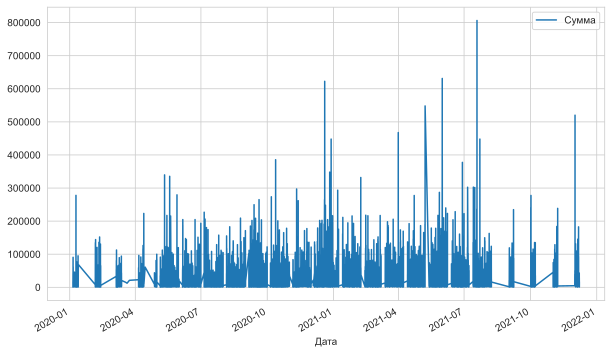

In [17]:
dt.plot()

In [ ]:
#Ваш код

#График распределения плотности
# +


In [19]:
dt.index[dt.Сумма == dt.Сумма.max()]

DatetimeIndex(['2021-07-18 21:52:00'], dtype='datetime64[ns]', name='Дата', freq=None)

In [91]:
import statistics

i = 'Сумма'

print('Среднеквадратичное отклонение, смещённое: ',dt[i].std(ddof=0))
print('Среднеквадратичное отклонение : ', dt[i].std(ddof=1))
print('Медиана : ',dt[i].median())
print('Среднее : ',dt[i].mean())
print('Дисперсия : ',dt[i].var(ddof=1))
print('Мода : ', statistics.mode(dt[i]))  
print('Мультимода : ', statistics.multimode(dt[i]))
print('\n')



Сумма
Среднеквадратичное отклонение, смещённое:  26454.887238409432
Среднеквадратичное отклонение :  26455.42115744313
Медиана :  12250.0
Среднее :  19896.00714066609
Дисперсия :  699889308.6176895
Мода :  4490.0
Мультимода :  [4490.0]




In [8]:
from scipy.stats import kurtosis, kurtosistest
from scipy.stats import skew, skewtest

df= datas[['Транзакция','Клиент','Товар','Сумма']]

for i in df:
    var = datas[i]
    k = kurtosis(var)
    zscore, pvalue = kurtosistest(var)
    print(i)
    print('Эксцесс : %0.3f, z-score : %0.3f, p-value : %03.f' % (k ,zscore, pvalue))
    print('\n')
 
for i in df:
    var = datas[i]
    k = skew(var)
    zscore, pvalue = skewtest(var)
    print(i)
    print('Ассиметрия : %0.3f, z-score : %0.3f, p-value : %03.f' % (k ,zscore, pvalue))
    print('\n')

Транзакция
Эксцесс : -1.218, z-score : -223.415, p-value : 000


Клиент
Эксцесс : -0.952, z-score : -91.782, p-value : 000


Товар
Эксцесс : -1.203, z-score : -206.931, p-value : 000


Сумма
Эксцесс : 158.810, z-score : 141.472, p-value : 000


Транзакция
Ассиметрия : -0.010, z-score : -0.876, p-value : 000


Клиент
Ассиметрия : 0.422, z-score : 35.884, p-value : 000


Товар
Ассиметрия : -0.295, z-score : -25.603, p-value : 000


Сумма
Ассиметрия : 7.557, z-score : 211.502, p-value : 000




Визуальный подход

Количество товаров : 
4944.0    725
4911.0    580
3487.0    435
434.0     430
2635.0    425
         ... 
5107.0      1
3317.0      1
2713.0      1
2799.0      1
2334.0      1
Name: Товар, Length: 5293, dtype: int64


<AxesSubplot:xlabel='Товар', ylabel='Density'>

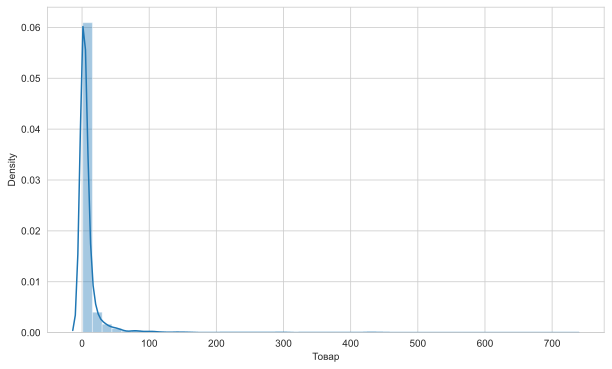

In [10]:
#График распределения плотности
print('Количество товаров : ') 
print(datas['Товар'].value_counts())
sns.distplot(datas['Товар'].value_counts())


График распределения по сумме товара : 


<AxesSubplot:xlabel='Сумма', ylabel='Density'>

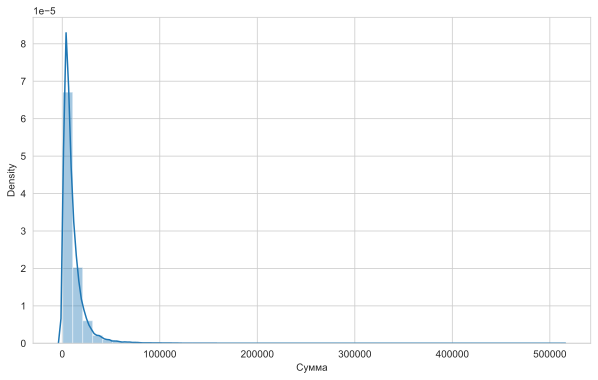

In [11]:
print('График распределения по сумме товара : ')
sns.distplot(datas['Сумма'])

Text(0.5, 1.0, 'Частота покупок')

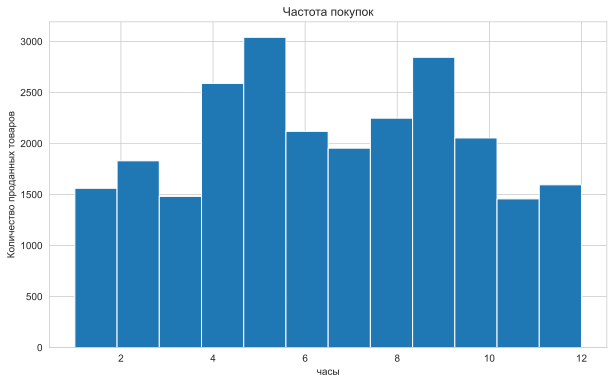

In [183]:
# Частота покупок от месяца

plt.hist(dtcount['Дата'].dt.month.values, bins=12)
plt.xlabel('месяцы')
plt.ylabel('Количество проданных товаров')
plt.title('Частота покупок')

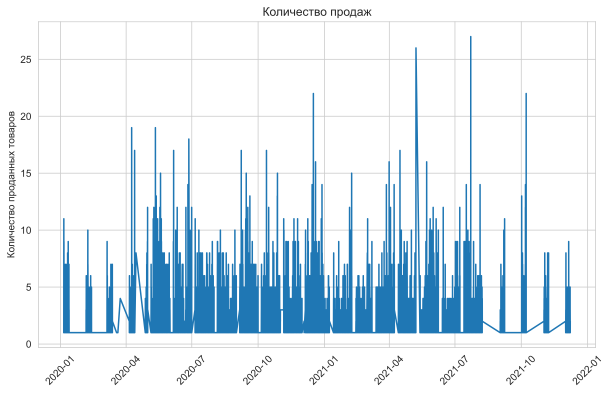

In [172]:
#График зависимости даты от суммы продаж или количество проданных товаров

plt.plot(dtcount['Дата'], dtcount['Товар'])
plt.title('Количество продаж')
plt.ylabel('Количество проданных товаров')
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Частота покупок')

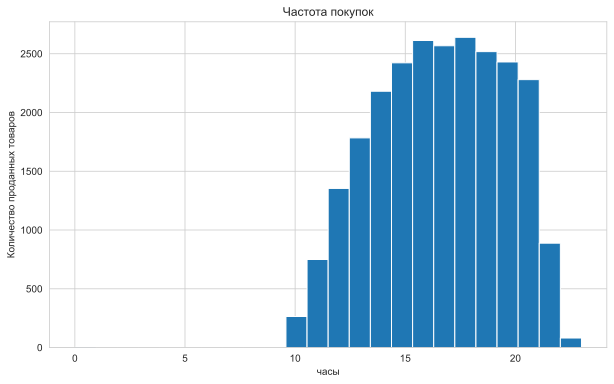

In [181]:
# Стобчатая диаграмма частоты покупок от количество часов
plt.hist(dtcount['Дата'].dt.hour.values, bins=24)
plt.xlabel('часы')
plt.ylabel('Количество проданных товаров')
plt.title('Частота покупок')

In [76]:
# Показать товары  максимальной выручкой за все время или популярные товары


#Создать дополнительные признаки по объем продаж и суммарное количество


In [ ]:
dtcount = datas[['Товар','Дата']].groupby('Дата').count().sort_values('Дата', ascending = True).reset_index()
dtcount
datas['Товар'].value_counts().describe()
datas.info()

**Корреляция**

In [ ]:
datas['Дата'].dt.month.corr(datas['Товар'].value_counts())

# xs = datas['Дата'].dt.month
# ys = datas['Товар']
# pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0,1, s=5, grid=True)
# plt.xlabel('Дата')
# plt.ylabel('количество товара')
# plt.show()

In [ ]:
#Ваш код
# Вывести график sns.heatmap
corr = datas.corr()
corr_greater_than_50 = corr[corr>=.5]
corr_greater_than_50

sns.heatmap

### 5.	Выполнить проверку гипотез о данных

5.1 Зависит ли частота покупок от месяца?

In [1]:
#Ваш код

 5.2 Больше лучших клиентов, чем потерянных клиентов?
 
 Т.е. выяснить больше ли клиентов, которые покупали совсем недавно, чаще всего и тратят больше всего, 
 чем клиентов, у которых последняя покупка была давно, и покупали мало и тратили мало.

In [1]:
#Ваш код

### 6. Кластеризация по товарам

In [ ]:
#Ваш код
import sklearn

kmeans = KMeans(n_clusters = 5, random_state =0).fit(dtcount[['Количество', 'Сумма']])

### 7. Важные признаки

In [ ]:
#Ваш код

### 8.	Рекомендации

In [ ]:
#Ваш код


## Вывод